In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from train_model import ModelTrainer

In [2]:
data_path = "../../data/processed/processed_stock_data.csv"
path = '../../data/interim/engineered_features.csv'
df = pd.read_csv(path, parse_dates=["Date"])

df.set_index("Date", inplace=True)
# df = df[["Close/Last"]]  # Using only close prices for CNN input

df.tail()

,Close/Last,Volume,Open,High,Low,Year,Month,Day,DayOfWeek,IsWeekend,...,Rolling_Return_30,SMA_10,EMA_10,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Target_Close_Next_Day,Target_UpDown
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-29,206.28,62308820.0,209.80,214.8900,205.97,2024,8,29,3,0,...,-1.431667,214.864,211.270095,53.838631,-2.048580,-1.791235,226.838799,189.888201,214.11,1
2024-08-30,214.11,63370610.0,208.63,214.5701,207.03,2024,8,30,4,0,...,-0.836333,214.663,211.786441,59.538567,-1.698727,-1.772734,227.333581,190.037419,210.60,0
2024-09-03,210.60,76714220.0,215.26,219.9043,209.64,2024,9,3,1,0,...,-1.363667,213.451,211.570725,51.724997,-1.685267,-1.755240,227.350080,191.192920,219.41,1
2024-09-04,219.41,80651770.0,210.59,222.2200,210.57,2024,9,4,2,0,...,-0.899000,213.282,212.996048,60.907441,-0.952724,-1.594737,228.350604,192.069396,230.17,1
2024-09-05,230.17,119355000.0,223.49,235.0000,222.25,2024,9,5,3,0,...,0.472667,213.972,216.118584,59.938004,0.490411,-1.177707,230.179380,194.081620,210.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 221 entries, 2023-10-19 to 2024-09-05
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Close/Last                 221 non-null    float64
 1   Volume                     221 non-null    float64
 2   Open                       221 non-null    float64
 3   High                       221 non-null    float64
 4   Low                        221 non-null    float64
 5   Year                       221 non-null    int64  
 6   Month                      221 non-null    int64  
 7   Day                        221 non-null    int64  
 8   DayOfWeek                  221 non-null    int64  
 9   IsWeekend                  221 non-null    int64  
 10  Close/Last_lag_1           221 non-null    float64
 11  Close/Last_lag_2           221 non-null    float64
 12  Close/Last_lag_3           221 non-null    float64
 13  Volume_lag_1               221 

In [4]:
df.columns

Index(['Close/Last', 'Volume', 'Open', 'High', 'Low', 'Year', 'Month', 'Day',
       'DayOfWeek', 'IsWeekend', 'Close/Last_lag_1', 'Close/Last_lag_2',
       'Close/Last_lag_3', 'Volume_lag_1', 'Volume_lag_2', 'Volume_lag_3',
       'Close/Last_roll_mean_7', 'Close/Last_roll_median_7',
       'Close/Last_roll_std_7', 'Close/Last_roll_max_7',
       'Close/Last_roll_min_7', 'Close/Last_roll_mean_14',
       'Close/Last_roll_median_14', 'Close/Last_roll_std_14',
       'Close/Last_roll_max_14', 'Close/Last_roll_min_14',
       'Close/Last_roll_mean_30', 'Close/Last_roll_median_30',
       'Close/Last_roll_std_30', 'Close/Last_roll_max_30',
       'Close/Last_roll_min_30', 'Volume_roll_mean_7', 'Volume_roll_median_7',
       'Volume_roll_std_7', 'Volume_roll_max_7', 'Volume_roll_min_7',
       'Volume_roll_mean_14', 'Volume_roll_median_14', 'Volume_roll_std_14',
       'Volume_roll_max_14', 'Volume_roll_min_14', 'Volume_roll_mean_30',
       'Volume_roll_median_30', 'Volume_roll_std_30', 

In [5]:
feature_cols = ["Close/Last", 'Target_Close_Next_Day', 'Daily_Return', 'SMA_10', 'EMA_10', 'RSI_14', 'MACD', 'Bollinger_Upper']
target_col = "Target_Close_Next_Day"

In [6]:
models = ['cnn', 'lstm', 'hybrid']

results = []

In [7]:
for model_name in models:
    print(f"\nTraining {model_name.upper()} model...")
    trainer = ModelTrainer(
        model_name=model_name,
        feature_cols=feature_cols,
        target_col=target_col,
        test_size=0.2,
        val_size=0.1
    )
    model_results = trainer.train_and_evaluate(df)
    model_results["Model"] = model_name.upper()
    results.append(model_results)
print('---->>')


Training CNN model...
Epoch 1/100


D:\python3x\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1291 - mae: 0.3022 - val_loss: 0.3504 - val_mae: 0.5884
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - mae: 0.1348 - val_loss: 0.2096 - val_mae: 0.4537
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080 - mae: 0.0747 - val_loss: 0.0705 - val_mae: 0.2590
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mae: 0.0667 - val_loss: 0.1843 - val_mae: 0.4247
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 - mae: 0.0552 - val_loss: 0.1589 - val_mae: 0.3936
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - mae: 0.0465 - val_loss: 0.1472 - val_mae: 0.3784
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mae: 0.0471 - val_loss: 0.1538 - val_mae: 0.3869
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0034 - mae: 0.0463 - val_loss: 0.1236 - val_mae: 0.3457
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - mae: 0.0496 - val_loss: 

D:\python3x\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.1907 - val_loss: 0.6051
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0538 - val_loss: 0.2074
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0389 - val_loss: 0.1867
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0226 - val_loss: 0.2962
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0106 - val_loss: 0.3392
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - val_loss: 0.2777
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0078 - val_loss: 0.2000
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059 - val_loss: 0.1779
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055 - val_loss: 0.2123
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0064 - val_loss: 0.2397
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0060 - val_loss: 0.1980
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0054 - val_loss: 0.1598
E

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015 - val_loss: 0.0259
Epoch 71/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015 - val_loss: 0.0204
Epoch 72/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0016 - val_loss: 0.0297
Epoch 73/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0016 - val_loss: 0.0119
Epoch 74/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0015 - val_loss: 0.0247
Epoch 75/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0017 - val_loss: 0.0233
Epoch 76/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0011 - val_loss: 0.0142
Epoch 77/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0016 - val_loss: 0.0313
Epoch 78/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0016 - val_loss: 0.0226
Epoch 79/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0017 - val_loss: 0.0143
Epoch 80/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0016 - val_loss: 0.0325
Epoch 81/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0014 - val_loss: 

D:\python3x\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0357 - val_loss: 0.1861
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - val_loss: 0.2718
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0071 - val_loss: 0.1335
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0117 - val_loss: 0.2059
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0053 - val_loss: 0.2139
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0056 - val_loss: 0.1397
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0050 - val_loss: 0.1298
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0061 - val_loss: 0.1269
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0038 - val_loss: 0.1012
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0048 - val_loss: 0.0830
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0039 - val_loss: 0.0749
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032 - val_loss: 0.0951
E

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0010 - val_loss: 0.0481
Epoch 71/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0011 - val_loss: 0.0545
Epoch 72/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0014 - val_loss: 0.0539
Epoch 73/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0011 - val_loss: 0.0548
Epoch 74/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0013 - val_loss: 0.0415
Epoch 75/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0011 - val_loss: 0.0449
Epoch 76/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0015 - val_loss: 0.0490
Epoch 77/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0011 - val_loss: 0.0580
Epoch 78/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0013 - val_loss: 0.0490
Epoch 79/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.8962e-04 - val_loss: 0.0474
Epoch 80/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0011 - val_loss: 0.0514
Epoch 81/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.7795e-04 - va

In [8]:
results_df = pd.DataFrame(results)
display(results_df)
# print(results_df.info())

# Save results
# results_df.to_csv("results/model_comparison.csv", index=False)

,MAE,RMSE,Model
0,10.854638,13.942570,CNN
1,6.481541,7.019525,LSTM
2,5.339890,7.221533,HYBRID


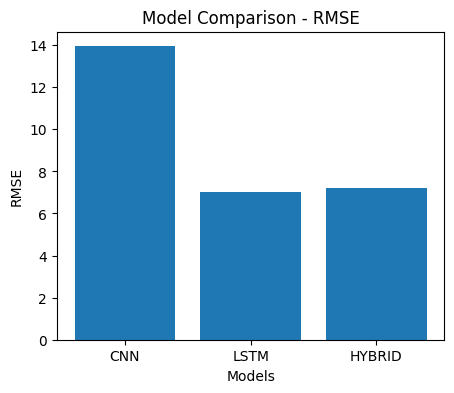

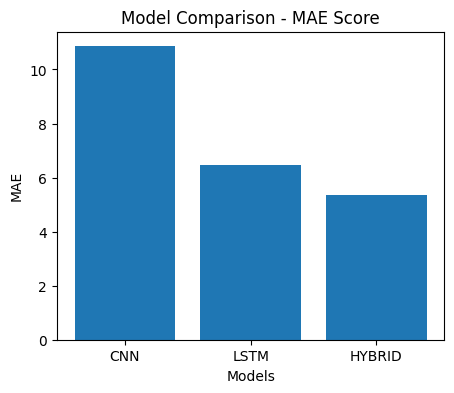

In [9]:
plt.figure(figsize=(5,4))
plt.bar(results_df["Model"], results_df["RMSE"])
plt.title("Model Comparison - RMSE")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.show()

plt.figure(figsize=(5,4))
plt.bar(results_df["Model"], results_df["MAE"])
plt.title("Model Comparison - MAE Score")
plt.xlabel("Models")
plt.ylabel("MAE")
plt.show()